In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
data = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")

In [3]:
data.shape

(200, 6)

200 rows and 6 columns

In [4]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
data.isna().sum()
# no NAs in the data

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Drug classes

In [6]:
data.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [7]:
#  List comprehension
#print([3 if test_data.loc[i,"BP"] == "HIGH" else 2 if test_data.loc[i,"BP"] == "NORMAL" else 1 for i in range(len(test_data))])

#### BP column

In [8]:
data.groupby(by="BP").Age.count()

BP
HIGH      77
LOW       64
NORMAL    59
Name: Age, dtype: int64

BP :
Low-1
Normal-2
High-3

In [9]:
# Coding numeric values to the column BP
bp = {"HIGH": 3, "NORMAL":2, "LOW":1}
data.BP = data.BP.apply(lambda s: bp[s])

### Cholesterol column

In [10]:
data.groupby(by="Cholesterol").Age.count()

Cholesterol
HIGH      103
NORMAL     97
Name: Age, dtype: int64

Cholesterol:
Normal-1
High- 2

In [11]:
# Coding numeric values to the column Cholestrol
ch = {"HIGH": 2, "NORMAL":1}
data.Cholesterol = data.Cholesterol.apply(lambda c: ch[c])

### Sex column

In [12]:
data.groupby(by="Sex").Age.count()

Sex
F     96
M    104
Name: Age, dtype: int64


Sex:
Female-1
Male-2

In [13]:
# Coding numeric value to the column Sex
sex = {"F":1, "M":2}
data.Sex = data.Sex.apply(lambda s: sex[s])

In [14]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,3,2,25.355,DrugY
1,47,2,1,2,13.093,drugC
2,47,2,1,2,10.114,drugC
3,28,1,2,2,7.798,drugX
4,61,1,1,2,18.043,DrugY


In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
# Splitting the data into training and testing data
idx = random.sample(range(len(data)),150)
train_data = data.iloc[idx,:]
test_data = data.drop(idx)

In [17]:
# Training data
trainx = train_data.iloc[:,:5]
trainy = train_data.iloc[:,5]

# Testing data
testx = test_data.iloc[:,:5]
testy = test_data.iloc[:,5]

In [18]:
trainx.iloc[0,:]

Age            31.000
Sex             2.000
BP              3.000
Cholesterol     1.000
Na_to_K        17.069
Name: 74, dtype: float64

In [19]:
trainx.iloc[1,:]

Age            35.000
Sex             1.000
BP              3.000
Cholesterol     2.000
Na_to_K        12.894
Name: 137, dtype: float64

In [20]:
trainx.iloc[0,:] - trainx.iloc[1,:]

Age           -4.000
Sex            1.000
BP             0.000
Cholesterol   -1.000
Na_to_K        4.175
dtype: float64

In [21]:
sum(trainx.iloc[0,:] - trainx.iloc[1,:])

0.17499999999999893

## **Nearest neighbour**

In [22]:
# calculating L2 distance between 2 vectors
def L2_distance(x,y):
    distance = sum(pow(x - y,2))
    return distance   

def find_NN(testx_i):
    idx = np.argmin([L2_distance(trainx.iloc[i,:],testx_i) for i in range(len(trainx))])
    predicted_drug = trainy.iloc[idx,]
    return predicted_drug

In [23]:
import time
t_before = time.time()
predicted_drugs = [find_NN(testx.iloc[i,:]) for i in range(len(testx))]
t_after = time.time()

L2_model_time = t_after - t_before
print("L2 model time: ",L2_model_time)

L2 model time:  2.7883222103118896


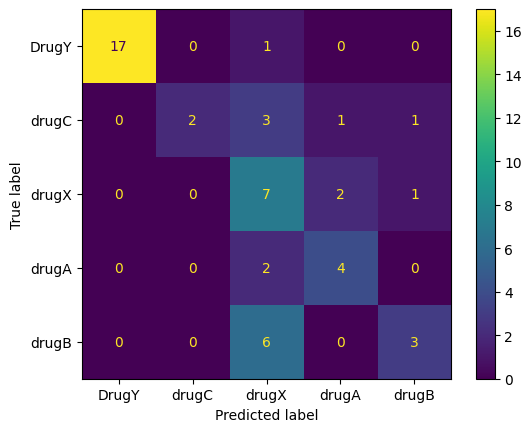

In [24]:
# Confusion matrix between actual and predicted labels
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(testy,predicted_drugs,labels=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'])
cm_display = metrics.ConfusionMatrixDisplay(cm,display_labels=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'])
cm_display.plot()
plt.show()

In [25]:
# Error rate
error = sum(testy != predicted_drugs) / len(testy)
print(f"Error: {error*100}%")

Error: 34.0%
